# Selecting and Filtering Data

```{admonition} Summary
:class: hint


```

For analyzing the data, if the data is huge, the processing with Jupyter will take more time, or sometimes the result will not be visualized. So the data could be limited to small parts by selecting the data of interest.

Load data first.

In [9]:
import geopandas as gp
import pandas as pd
from pathlib import Path

INPUT = Path.cwd().parents[0] / "00_data"
gdb_path = INPUT / "LBM_2018_IS_DD_gdb" / "LBM_2018_IS_DD.gdb"

gdf = gp.read_file(gdb_path, layer="LBM2018_IS_DD")

The headers (attributes) of the data are called.

In [10]:
list(gdf.columns)

['KS_IS',
 'CLC_st1',
 'CLC18',
 'CLC',
 'Biotpkt2018',
 'Shape_Length',
 'Shape_Area',
 'geometry']

It is important to have information about the format of each attribute. 

`````{admonition} Essentials of Attribute Formatting
:class: note
When working with attributes:
- Use quotes ('  ') for text or numbers stored as string (object) format
- For numeric values (like integers or floats), use them directly without quotes.

`````

In [11]:
gdf.dtypes

KS_IS             object
CLC_st1           object
CLC18             object
CLC              float64
Biotpkt2018      float64
Shape_Length     float64
Shape_Area       float64
geometry        geometry
dtype: object

```{figure} ../resources/22.png
:name: figure-example

Attributes in Dataset Based on the Metadata
````


## Unique Values Selection


The `unique` function returns all distinct values of an attribute.


**ex:** In this dataset, the `CLC_st1` attribute might have some identical values for land use (such as '313' for mixed forest or '512' for water bodies) but multiple features in the dataset recorded as mixed forest or water bodies.

```{figure} ../resources/19.png
:name: figure-example

Classification Code Interpretation
````


By defining the attribute of interest in this example "KS_IS", the unique values in this attribute are visualized.

In [12]:
unique_groups = gdf['KS_IS'].unique()
unique_groups

array(['SV', 'HW', 'BV', 'FV', 'WW', 'WP', 'FG', 'GT', 'FL', 'BN', 'BNL',
       'BL', 'HE', None], dtype=object)

```{figure} ../resources/21.png
:name: figure-example
Interpretation of the values in the "KS_IS" attribute
````


Also the number of the unique values can be accessed by `nunique` function.

In [13]:
unique_numbers = gdf['KS_IS'].nunique()
unique_numbers

13

`````{admonition} None values in nunique function!
:class: danger

By default, the `nunique` function does not count null or missing values.
`````

For including the `None` values as unique values, `dropna` parameter should modify to False.

In [14]:
unique_numbers = gdf['KS_IS'].nunique(dropna = False)
unique_numbers

14

The frequency of each unique value can be counted using the `groupby` method.


The data then is grouped by unique values, and the number of entries in each group is calculated using the `size` function.

In the following example, just 1 feature recorded for the category of BNL, while the category of WP has 1768 records in this dataset.

`````{admonition} Order of Groups with size function
:class: tip, dropdown
The result of `size` function is sorted based on unique values:
- For **string** unique values, sorting is in **alphabetical** order.
- For **number** unique values, sorting is in **ascending numerical** order.


**ex:** In the following example, the unique values are in the string format so they ordered alphabetically as BL, BN, ...
`````


In [15]:
groupcounts = gdf.groupby('KS_IS').size()
pd.DataFrame(groupcounts).T

KS_IS,BL,BN,BNL,BV,FG,FL,FV,GT,HE,HW,SV,WP,WW
0,640,4,1,13,1737,36,2,391,22,1194,271,1768,575


The frequency of unique values can also be counted using the `value_counts` method.


`````{admonition} Order of Groups with value_counts function
:class: tip, dropdown
The output of the `value_counts` function is sorted in descending order based on the frequency counts.


**ex:** In the following example the counts ordered descending.
`````


In [16]:
groupcounts = gdf["KS_IS"].value_counts()
pd.DataFrame(groupcounts).T

KS_IS,WP,FG,HW,BL,WW,GT,SV,FL,HE,BV,BN,FV,BNL
count,1768,1737,1194,640,575,391,271,36,22,13,4,2,1


In a long list of unique values, if the number of features for a specific group is needed, it can be accessed like a value for a key in a dictionary.

In the following example, the output shows that in this dataset 271 features recorded as SV (representing roads).

In [17]:
sv_count = groupcounts['SV']
sv_count

271

`````{admonition} Format Importance Use Case
:class: warning,
The importance of attribute formatting, mentioned at the beginning of this chapter, will be highlighted here. In the previous example, the values were text (string), so for calling the values, the quotes were used. On the other hand, in the following examples, the values for both attributes of "CLC_st1" and "Biotpkt2018" are numbers, while the format of the first is an object (string) and the second is a float.
`````

- **String format**
- Below, we also sort values (`.sort_values()`)
- and only return the first `[:10]` entries

In [18]:
group_1 = gdf.groupby('CLC_st1').size()
group_1.sort_values(ascending=False)[:10]

CLC_st1
112    7187
122    5454
231    3293
121    2732
511    2563
142    2413
311    1787
141    1627
313    1594
312    1546
dtype: int64

Access a specific index value:

In [19]:
group_1['141']

1627

- **Float format**

In [20]:
group_2 = gdf.groupby('Biotpkt2018').size()
group_2

Biotpkt2018
0.000000      16
0.500000      55
1.000000      52
1.500000     102
2.000000     131
            ... 
16.928546     36
17.079406      3
17.381302     10
18.055116    667
20.164493      8
Length: 69, dtype: int64

In [21]:
group_2[1.000000]

52

```{admonition} Importance of the precision of float format!
:class: note, dropdown
Sometimes, due to the precision of the float format, the printed output of the `groupby` or `value_counts` function may not exactly match the value in the DataFrame. In this case, if a value from their output is called directly, an error will occur.

The following figure is an example of this note, when the value "18.055116" called. This value is an output of the `groupby` function in the previous step, but it is a rounded value, and this value in the dataset includes additional decimal places like 18.05511611 or 18.05511689 or ...

```{figure} ../resources/14_.png
:width: 700px
:name: figure-example 
Error of calling rounded values instead of precise values in the dataset
````
```

## Selection of String Values

After becoming familiar with attributes and unique values of the features, the required features can be selected:

If only features with a specific value are needed, the value can be called directly:


In [22]:
filtered_data = gdf[gdf['KS_IS'] == 'FG']
filtered_data.head(5)

,KS_IS,CLC_st1,CLC18,CLC,Biotpkt2018,Shape_Length,Shape_Area,geometry
3823,FG,511,None,NaN,12.594189,491.915386,1070.836783,"MULTIPOLYGON (((415374.978 5648049.894, 415371..."
3824,FG,511,None,NaN,12.594189,268.168647,581.000813,"MULTIPOLYGON (((415477.458 5648133.623, 415476..."
3825,FG,511,None,NaN,12.594189,16.334540,15.163151,"MULTIPOLYGON (((415489.003 5648142.273, 415488..."
3826,FG,511,None,NaN,12.594189,1436.401563,3210.514272,"MULTIPOLYGON (((415773.656 5648659.571, 415773..."
3827,FG,511,None,NaN,12.594189,399.339616,877.628801,"MULTIPOLYGON (((415930.38 5648763.655, 415926...."


In [23]:
filtered_data = gdf[gdf['CLC_st1'] == '133']
filtered_data.head(5)

,KS_IS,CLC_st1,CLC18,CLC,Biotpkt2018,Shape_Length,Shape_Area,geometry
11831,None,133,133,133.0,6.035751,17.828953,0.432276,"MULTIPOLYGON (((411237.019 5656164.663, 411228..."
24343,None,133,133,133.0,6.035751,287.703701,4278.338534,"MULTIPOLYGON (((411656.913 5656302.92, 411664...."
24344,None,133,133,133.0,6.035751,183.544225,2066.507754,"MULTIPOLYGON (((411567.287 5656337.438, 411562..."
24347,None,133,133,133.0,6.035751,213.015432,2684.440542,"MULTIPOLYGON (((411587.489 5655959.618, 411588..."


## Selection of Float Values


In [24]:
filtered_data = gdf[gdf['Biotpkt2018'] == 1.000000]
filtered_data.head(5)

,KS_IS,CLC_st1,CLC18,CLC,Biotpkt2018,Shape_Length,Shape_Area,geometry
9492,None,111,111,111.0,1.0,411.855290,2480.458787,"MULTIPOLYGON (((406985.474 5655597.694, 406984..."
9504,None,111,111,111.0,1.0,89.433492,466.944726,"MULTIPOLYGON (((416782.224 5652196.728, 416782..."
9514,None,111,111,111.0,1.0,172.927119,1621.632535,"MULTIPOLYGON (((419300.05 5657313.72, 419299.9..."
9515,None,111,111,111.0,1.0,320.578260,3691.824728,"MULTIPOLYGON (((408302.234 5655785.262, 408296..."
9519,None,111,111,111.0,1.0,121.899927,920.751286,"MULTIPOLYGON (((414687.929 5655817.21, 414656...."


`````{admonition} Importance of the precision of float format!
:class: note, dropdown
As mentioned in the previous note, for float values, due to precision, it may sometimes show an empty DataFrame (meaning no feature with this value exists), while in `groupby` or `value_counts` functions, it may indicate that some features with this value exist.

```{figure} ../resources/15_.png
:width: 600px
:name: figure-example
Empty output for calling rounded values instead of precise values in the dataset
````
`````

In [25]:
# Codes of the upper note
filtered_data = gdf[gdf['Biotpkt2018'] == 18.055116]
filtered_data.head(5)

,KS_IS,CLC_st1,CLC18,CLC,Biotpkt2018,Shape_Length,Shape_Area,geometry


If features with more than one specific value are needed, the values can be called as a list using `isin` method.

In [28]:
filtered_data = gdf[gdf['CLC_st1'].isin(['133', '321', '411'])]
filtered_data.head(5)

,KS_IS,CLC_st1,CLC18,CLC,Biotpkt2018,Shape_Length,Shape_Area,geometry
11831,None,133,133,133.0,6.035751,17.828953,0.432276,"MULTIPOLYGON (((411237.019 5656164.663, 411228..."
23859,None,321,321,321.0,20.164493,618.702965,18317.038350,"MULTIPOLYGON (((415627.211 5652243.292, 415579..."
23860,None,321,321,321.0,20.164493,1099.972947,10894.472486,"MULTIPOLYGON (((418611.74 5653542.485, 418618...."
23861,None,321,321,321.0,20.164493,1023.775893,22918.685826,"MULTIPOLYGON (((418506.559 5653953.337, 418516..."
23862,None,321,321,321.0,20.164493,1126.678849,17980.357862,"MULTIPOLYGON (((418145.759 5654361.049, 418151..."


It is also possible to explore the range of the data for numeric values, such as area.


To find the minimum and maximum values of the features, the following code is used:
- `min`: minimum value in the specified attribute
- `max`: maximum value in the specified attribute
- `:0.8f`: `:f` treated the value as a float, and `0.8` rounded the number of decimals to 8 numbers



`````{admonition} 
:class: tip
For more controlling over the output visit[here](https://python.aims.ac.za/pages/format_str.html#id4)
`````



In [29]:
min_value = gdf['Shape_Area'].min()
max_value = gdf['Shape_Area'].max()
print(f"minimum: {min_value:0.8f}")
print(f"maximum: {max_value:0.2f}")

minimum: 0.00000562
maximum: 3249895.12


Now that information about the attributes of features and the values assigned to them has been obtained, it is possible to decide which part of the data is of interest.


For example, it can be decided to work only with the features having areas less than 1000.


In [30]:
filter_db = gdf[gdf['Shape_Area'] < 1000]

Then plot the filtered data.

- `linewidth`: The thickness of the lines
- `edgecolor`: The color of the edges of shapes
- `set_title`: Title of plot
- `set_axis_off`: Hides the axis

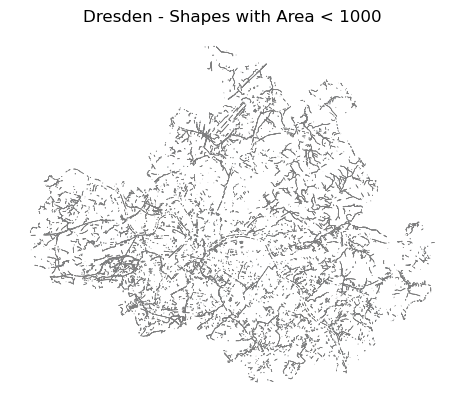

In [31]:
ax = filter_db.plot(linewidth=0.5, edgecolor='0.5')
ax.set_title("Dresden - Shapes with Area < 1000")
ax.set_axis_off()

For having more control over the figure, it is usually adviced to create a matplotlib figure object ahead of time.

For this reason the package imported.

In [32]:
import matplotlib.pyplot as plt


Then by defining different parameters for figure and subplots the visualization are customized. 

- `Figure (fig)`: The overall canvas containing the subplots
- `Subplot (ax)`: An individual plotting area inside the figure
- `nrows` and `ncols`: The number of the subplots in each row and column of the figure
- `figsize`: The size of the figure in inch
- `dpi`: The resolution of the figure


The `ax` parameter in the `plot` is used to specify in which subplot, the plot should be created.

```{admonition} How ax parameter works!
:class: dropdown
In the following example, there is just one subplot in the figure. But in case there are more subplots the `ax` parameter works as the following example:

fig, ax = plt.subplots(nrows=2, ncols=3) # Creating 6 subplots 2 in rows, 3 in columns

- ax1 = ax[0, 0]  # First row, first column
- ax2 = ax[0, 1]  # First row, second column
- ax3 = ax[0, 2]  # First row, third column
- ax4 = ax[1, 0]  # Second row, first column
- ax5 = ax[1, 1]  # Second row, second column
- ax6 = ax[1, 2]  # Second row, third column


# Plot in the First row, third column

ax3 = filter_db.plot(ax=ax3, linewidth=0.5, edgecolor='0.5') 

ax3.set_title("Figure 3")

# Plot in the Second row, first column

ax4 = filter_db.plot(ax=ax4, linewidth=0.5, edgecolor='0.5') 

ax4.set_title("Figure 4") 
```

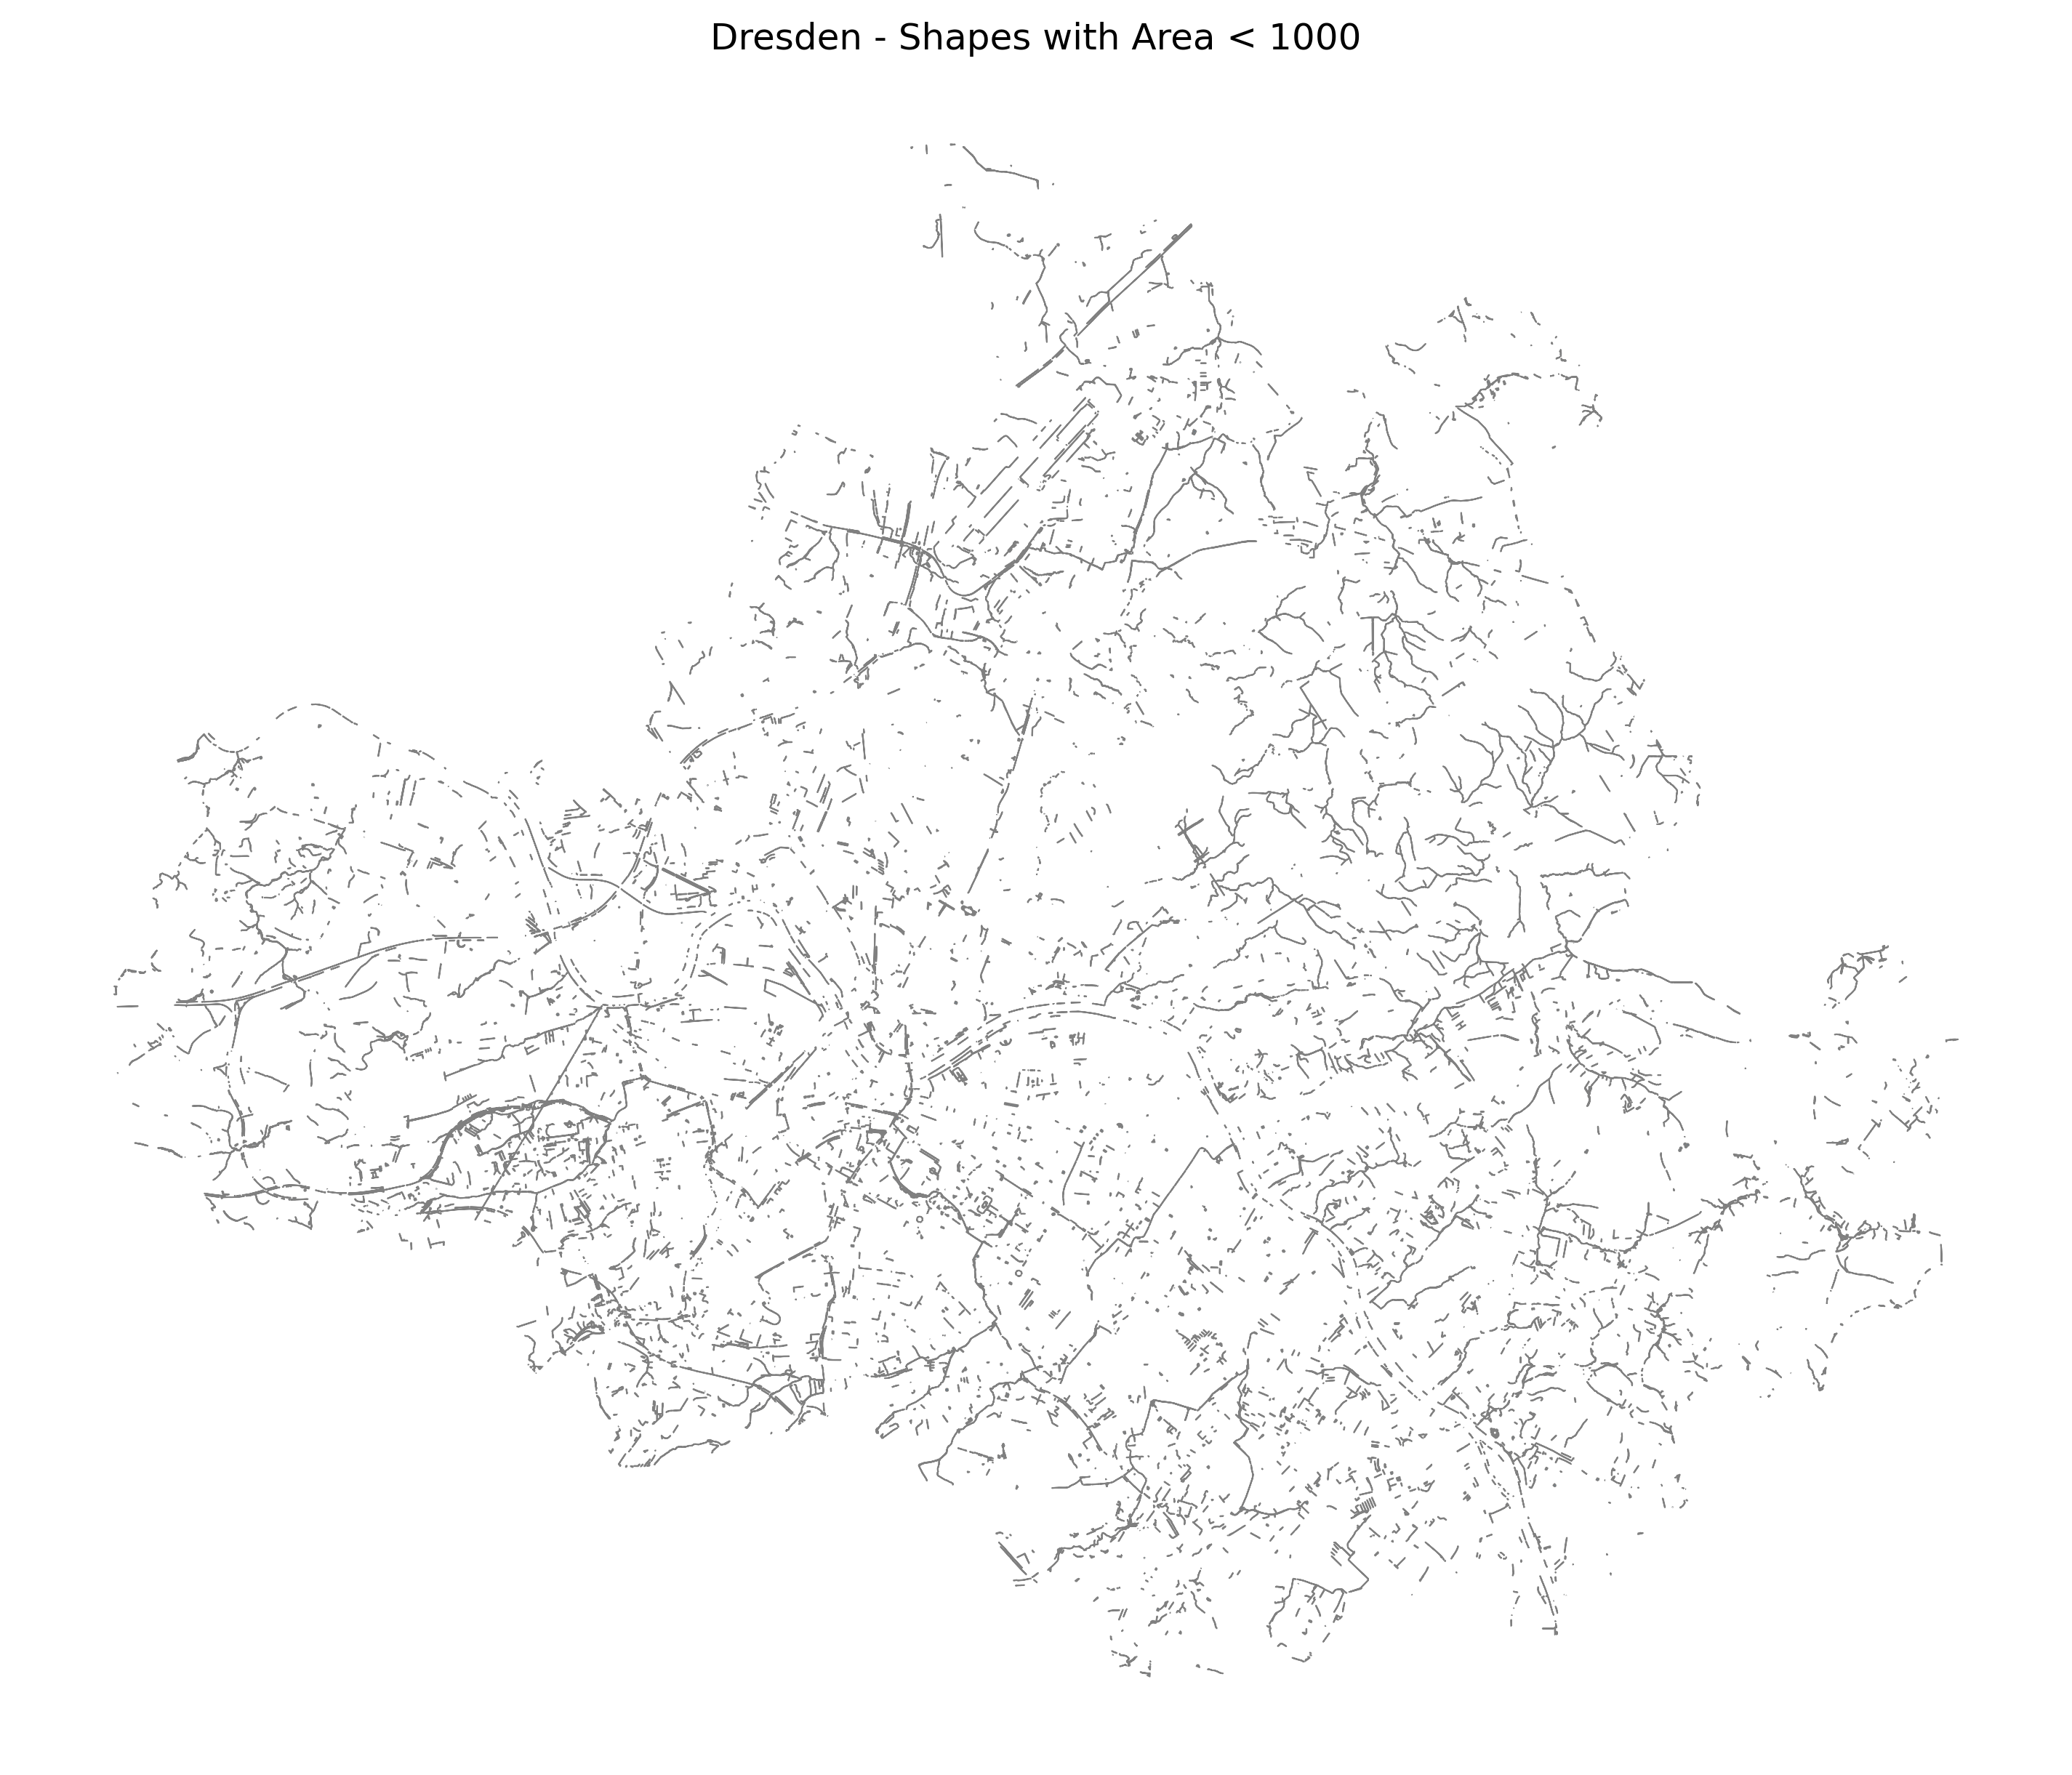

In [33]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(12, 18), dpi=300)
ax = filter_db.plot(ax=ax, linewidth=0.5, edgecolor='0.5')
ax.set_title("Dresden - Shapes with Area < 1000")
ax.set_axis_off()

It is also possible to use a widget to interactively visualize the desired part of the data.

For this purpose, the [package ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) and the function `interact` from that library are imported.

In [34]:
import ipywidgets as widgets
from ipywidgets import interact

Then, a function is defined using def to display the features within the desired range.

The interactive part uses a slider to visualize different sections within the desired range.

- The `interact` function creates the slider by linking it to the user-defined function ShapeArea.
- ShapeArea is the defined `function name`.
- The values are defined between the `min` and `max` required areas with an interval (`step`) of 0.1. 

In the second line, the maximum value is set to 10000 to limit the data, and by moving the slider, the range of visualization changes accordingly.

In [ ]:
def ShapeArea(value):
    filtered_gdf = gdf[gdf['Shape_Area'] <= value]
    ax= filtered_gdf.plot()
    ax.set_axis_off()
    plt.show()  

interact(ShapeArea, value=widgets.FloatSlider(min=20000, max=70000, step=0.1));

<video autoplay loop muted no-controls>
  <source src="../_static/videos/recording_2025-02-06_155828.mp4" type="video/mp4" />
  <figcaption>Interactive Plot</figcaption>
  Your browser does not support the video tag.
</video>
<figcaption>Interactive Plot</figcaption>